### Optimal control of phenomenological models, e.g. the model model
This notebook shows how to compute the optimal control (OC) signal for the model model for a simple example task. For the Hopf-model the OC can be computed completely analogously.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')
    os.chdir('..')
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_singlenode, plot_oc_network

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

We stimulate the system with a known control signal, define the resulting activity as target, and compute the optimal control for this target. We define weights such that precision is penalized only (w_p=1, w_2=0). Hence, the optimal control signal should converge to the input signal.

In [2]:
# We import the model
model = WCModel()

# Some parameters to define stimulation signals
dt = model.params["dt"]
duration = 40.
amplitude = 10.
period = duration/4.

# We define a "zero-input", and a sine-input
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
input = np.copy(zero_input)
input[0,2:-1] = amplitude * np.sin(2.*np.pi*np.arange(0,duration-0.2, dt)/ period ) # other functions or random values can be used as well

# We set the duration of the simulation and the initial values
model.params["duration"] = duration
x_init = 0.011225367461896877
y_init = 0.013126741089502588
model.params["exc_init"] = np.array([[x_init]])
model.params["inh_init"] = np.array([[y_init]])

0.011225367461896877
0.013126741089502588


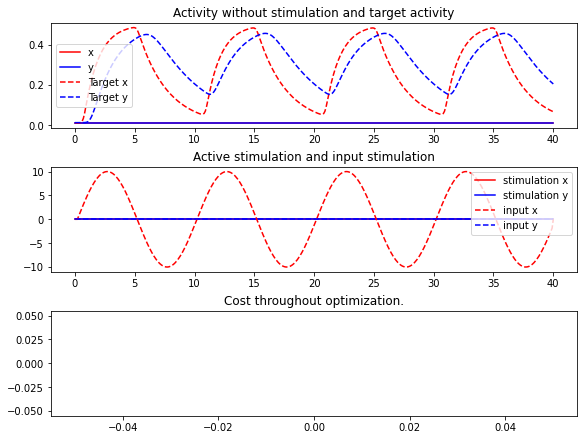

In [3]:
# We set the stimulus in x and y variables, and run the simulation
model.params["exc_ext"] = input
model.params["inh_ext"] = zero_input
model.run()

# Define the result of the stimulation as target
target = np.concatenate((np.concatenate( (model.params["exc_init"], model.params["inh_init"]), axis=1)[:,:, np.newaxis],
    np.stack( (model.exc, model.inh), axis=1)), axis=2)
target_input = np.concatenate( (input,zero_input), axis=0)[np.newaxis,:,:]

# Remove stimuli and re-run the simulation
model.params["exc_ext"] = zero_input
model.params["inh_ext"] = zero_input
control = np.concatenate( (zero_input,zero_input), axis=0)[np.newaxis,:,:]
model.run()

# combine initial value and simulation result to one array
state = np.concatenate((np.concatenate( (model.params["exc_init"], model.params["inh_init"]), axis=1)[:,:, np.newaxis],
    np.stack( (model.exc, model.inh), axis=1)), axis=2)

print(state[0,0,-1])
print(state[0,1,-1])

plot_oc_singlenode(duration, dt, state, target, control, target_input)

In [4]:
# We load the optimal control class
# print array (optional parameter) defines, for which iterations intermediate results will be printed
# Parameters will be taken from the input model
model.params["x_ext"] = zero_input
model.params["y_ext"] = zero_input
controlmat = np.zeros((1,2))
controlmat[0,0] = 1.
model_controlled = oc_wc.OcWc(model, target, w_p=1, w_2=0,
    print_array=[1,2,3,4,5,6,7,8,9,10,29,30,40,50,60,70,80,90,100,200,300,400,500, 600,700,800,900,1000],
    control_matrix = controlmat)

# We run 500 iterations of the optimal control gradient descent algorithm
model_controlled.step =200.
model_controlled.optimize(1)

state = model_controlled.get_xs()
control = model_controlled.control

plot_oc_singlenode(duration, dt, state, target, control, target_input, model_controlled.cost_history)
plt.plot(model_controlled.step_sizes_history)
plt.show()

Compute control for a deterministic system
Cost in iteration 0: 38.00417865217546
Cost in iteration 1: 18.0360071521742
Cost in iteration 2: 8.82625914617265


/home/lena/Promotion/neurolib/neurolib/optimal_control/oc_wc/oc_wc.py:376: RuntimeWarning: invalid value encountered in double_scalars
  fk[n, v, t] + self.adjoint_state[n, v, t] * self.control_matrix[n, v] * self.Duh()[n, v, v, t]
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!


diverging model output, decrease step size to  100.0
diverging model output, decrease step size to  50.0
diverging model output, decrease step size to  25.0
diverging model output, decrease step size to  12.5
diverging model output, decrease step size to  6.25
diverging model output, decrease step size to  3.125
diverging model output, decrease step size to  1.5625
diverging model output, decrease step size to  0.78125
diverging model output, decrease step size to  0.390625
diverging model output, decrease step size to  0.1953125
diverging model output, decrease step size to  0.09765625
diverging model output, decrease step size to  0.048828125
diverging model output, decrease step size to  0.0244140625
diverging model output, decrease step size to  0.01220703125
diverging model output, decrease step size to  0.006103515625
diverging model output, decrease step size to  0.0030517578125
diverging model output, decrease step size to  0.00152587890625
diverging model output, decrease step

ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:ro

diverging model output, decrease step size to  2.967364920549937e-65
diverging model output, decrease step size to  1.4836824602749686e-65
diverging model output, decrease step size to  7.418412301374843e-66
diverging model output, decrease step size to  3.7092061506874214e-66
diverging model output, decrease step size to  1.8546030753437107e-66
diverging model output, decrease step size to  9.273015376718553e-67
diverging model output, decrease step size to  4.636507688359277e-67
diverging model output, decrease step size to  2.3182538441796384e-67
diverging model output, decrease step size to  1.1591269220898192e-67
diverging model output, decrease step size to  5.795634610449096e-68
diverging model output, decrease step size to  2.897817305224548e-68
diverging model output, decrease step size to  1.448908652612274e-68
diverging model output, decrease step size to  7.24454326306137e-69
diverging model output, decrease step size to  3.622271631530685e-69
diverging model output, decrea

ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:root:nan in model output!
ERROR:ro

diverging model output, decrease step size to  3.522101828684134e-131
diverging model output, decrease step size to  1.761050914342067e-131
diverging model output, decrease step size to  8.805254571710335e-132
diverging model output, decrease step size to  4.402627285855167e-132
diverging model output, decrease step size to  2.2013136429275836e-132
diverging model output, decrease step size to  1.1006568214637918e-132
diverging model output, decrease step size to  5.503284107318959e-133
diverging model output, decrease step size to  2.7516420536594796e-133
diverging model output, decrease step size to  1.3758210268297398e-133
diverging model output, decrease step size to  6.879105134148699e-134
diverging model output, decrease step size to  3.4395525670743494e-134
diverging model output, decrease step size to  1.7197762835371747e-134
diverging model output, decrease step size to  8.598881417685874e-135
diverging model output, decrease step size to  4.299440708842937e-135
diverging mode

KeyboardInterrupt: 

In [ ]:
# Do another 100 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.step =400.
model_controlled.optimize(100)
state = model_controlled.get_xs()
control = model_controlled.control
plot_oc_singlenode(duration, dt, state, target, control, target_input, model_controlled.cost_history)
plt.plot(model_controlled.step_sizes_history)
plt.show()

Compute control for a deterministic system
Cost in iteration 0: 8.269663609547536
Cost in iteration 1: 8.201089697604731
Cost in iteration 2: 8.06056028088153
Cost in iteration 3: 7.903019137072246
Cost in iteration 4: 7.817157017104302
Cost in iteration 5: 7.809026511500035
Cost in iteration 6: 7.735700784709168
Cost in iteration 7: 7.722145818701039
Cost in iteration 8: 7.697249844029312
Cost in iteration 9: 7.685360653691185
Cost in iteration 10: 7.606663831694732


KeyboardInterrupt: 

### Network case

Let us know study a simple 2-node network of model oscillators. We first need to define the coupling matrix and the delay matrix. We can then initialize the model.

In [ ]:
cmat = np.array( [[0., 1.], [0.5, 0.]] )  # diagonal elements are zero, connection strength is 1 (0.5) from node 0 to node 1 (from node 1 to node 0)
dmat = np.array( [[0., 0.], [0., 0.]] )  # no delay

model = modelModel(Cmat=cmat, Dmat=dmat)
model.params.coupling = "additive" # use additive coupling

# we define the control input matrix to enable or disable certain channels and nodes
control_mat = np.zeros( (model.params.N, len(model.state_vars)) )
control_mat[0,0] = 1. # only allow inputs in y-channel in node 0

if control_mat[0,0] == 0. and control_mat[1,0] == 0:
    # if x is input channel, high connection strength can lead to numerical issues
    model.params.K_gl = 5. # increase for stronger connectivity, WARNING: too high value will cause numerical problems

model.params["duration"] = duration
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)
input = np.copy(zero_input)
input[0,1:-3] = np.sin(np.arange(0,duration-0.3, dt)) # other functions or random values can be used as well
model.params["xs_init"] = np.vstack( [x_init, x_init] )
model.params["ys_init"] = np.vstack( [y_init, y_init] )



# We set the stimulus in x and y variables, and run the simulation
input_nw = np.concatenate( (np.vstack( [control_mat[0,0] * input, control_mat[0,1] * input] )[np.newaxis,:,:],
                            np.vstack( [control_mat[1,0] * input, control_mat[1,1] * input] )[np.newaxis,:,:]), axis=0)
zero_input_nw = np.concatenate( (np.vstack( [zero_input, zero_input] )[np.newaxis,:,:],
                                 np.vstack( [zero_input, zero_input] )[np.newaxis,:,:]), axis=0)

model.params["x_ext"] = input_nw[:,0,:]
model.params["y_ext"] = input_nw[:,1,:]

model.run()

# Define the result of the stimulation as target
target = np.concatenate( (np.concatenate( (model.params["xs_init"], model.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (model.x, model.y), axis=1)), axis=2)

# Remove stimuli and re-run the simulation
model.params["x_ext"] = zero_input_nw[:,0,:]
model.params["y_ext"] = zero_input_nw[:,0,:]
model.run()

# combine initial value and simulation result to one array
state =  np.concatenate( (np.concatenate( (model.params["xs_init"], model.params["ys_init"]), axis=1)[:,:, np.newaxis], np.stack( (model.x, model.y), axis=1)), axis=2)

plot_oc_network(model.params.N, duration, dt, state, target, zero_input_nw, input_nw)

NameError: name 'modelModel' is not defined

Compute control for a deterministic system
Cost in iteration 1: 1.6849098053371576
Cost in iteration 2: 1.18029016784313
Cost in iteration 10: 0.11142857936425493
Cost in iteration 50: 0.001616869988977084
Cost in iteration 100: 0.0004110712294866493
Cost in iteration 200: 0.00011867489953064958
Cost in iteration 300: 4.639261934255246e-05
Cost in iteration 400: 2.128735808835483e-05
Cost in iteration 500: 1.1036664629510374e-05


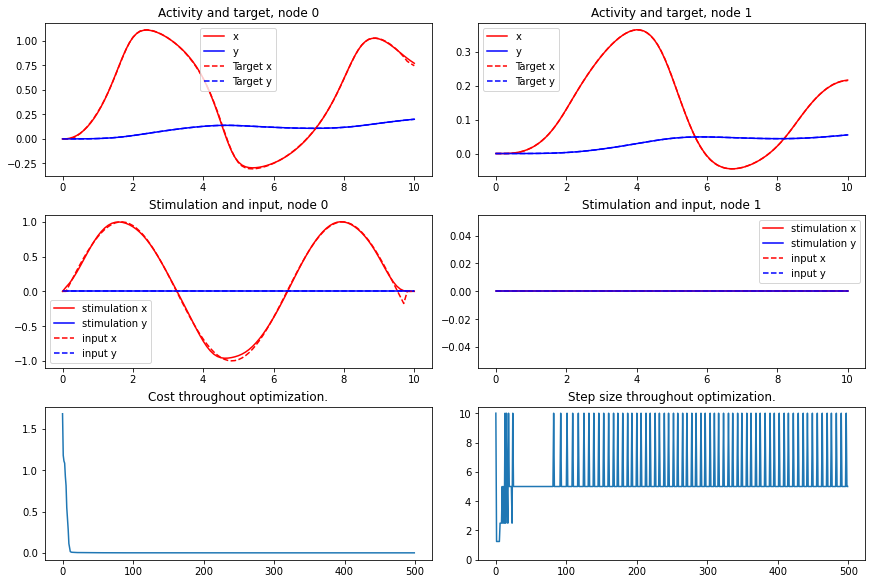

In [ ]:
prec_mat = np.zeros( (model.params.N, len(model.output_vars)) )
prec_mat[1,0] = 1. # only measure in y-channel in node 1

model.params["x_ext"] = zero_input_nw[:,0,:]
model.params["y_ext"] = zero_input_nw[:,0,:]
model_controlled = oc_model.Ocmodel(model, target, w_p=1, w_2=0, print_array=[1,2,10,50,100,200,300,400,500], control_matrix=control_mat, precision_matrix=prec_mat)

model_controlled.optimize(500)

state = model_controlled.get_xs()
control = model_controlled.control

plot_oc_network(model.params.N, duration, dt, state, target, control, input_nw, model_controlled.cost_history, model_controlled.step_sizes_history)

Compute control for a deterministic system
Cost in iteration 1: 1.0953661598084045e-05
Cost in iteration 2: 1.087825204254886e-05
Cost in iteration 10: 1.036206184723746e-05
Cost in iteration 50: 8.224560285336917e-06
Cost in iteration 100: 6.279369320742075e-06


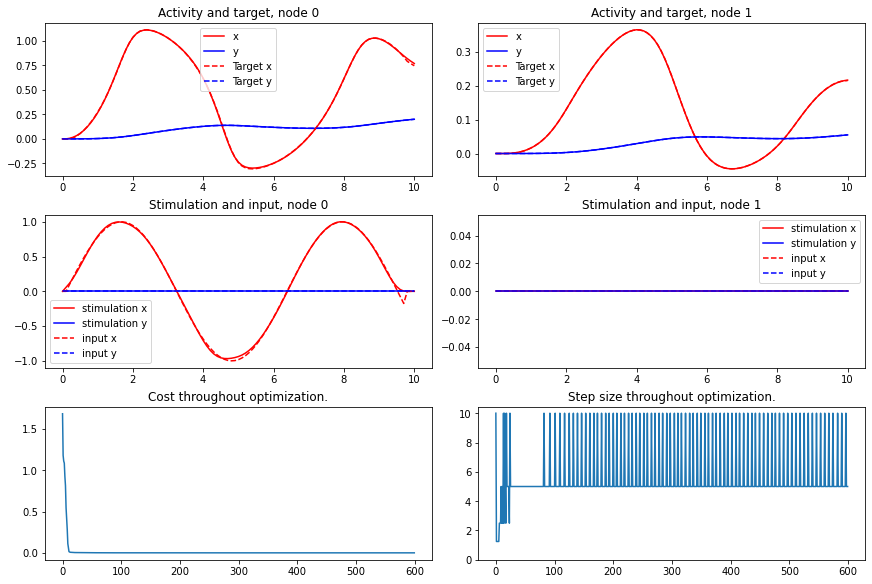

In [ ]:
# Do another 100 iterations if you want to.
# Repeated execution will continue with further 100 iterations.
model_controlled.optimize(100)
state = model_controlled.get_xs()
control = model_controlled.control
plot_oc_network(model.params.N, duration, dt, state, target, control, input_nw, model_controlled.cost_history, model_controlled.step_sizes_history)